## life cycle of ml project 
- understands the statements
- data collection
- data check to perform
- exploratory data analysis 
- data pre processing 
- model training 
- choose best model

## 1. problem statement-

understands how the students performance (test scores) is affecyed by other variable such as gender , ethnicity , parental level of education , lunch and tets preparatain course


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## import the csv data as pandas dtaframe

In [3]:
df = pd.read_csv('stud.csv')

## show top 5


In [4]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,associate degree,standard,completed,74,88,89
1,female,group A,associate degree,standard,completed,97,64,46
2,male,group A,associate degree,standard,completed,36,79,74
3,male,group E,master degree,free/reduced,completed,78,53,50
4,male,group D,high school,standard,completed,38,68,68


## shape of the dataset

In [6]:
df.shape

(1000, 8)

## check missing values


In [7]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## check duplicate


In [8]:
df.duplicated().sum()

0

## check data type


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## checking the numbers of unique values in each column

In [10]:
df.nunique()

gender                          2
ethnicity                       5
parental_level_of_education     5
lunch                           2
test_preparation_course         2
math_score                     70
reading_score                  65
writing_score                  65
dtype: int64

## cheching statics of data

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,65.174000,67.412000,66.873000
std,20.147944,18.442896,18.730876
min,30.000000,35.000000,35.000000
25%,47.000000,52.000000,51.000000
50%,66.000000,67.000000,67.000000
75%,84.000000,84.000000,83.000000
max,99.000000,99.000000,99.000000


## exploring data

In [12]:
# Categories in gender
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())


# Categories in race/ethnicity
print("Categories in 'ethnicity' variable: ", end=" ")
print(df['ethnicity'].unique())


# Categories in parental level of education
print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())


# Categories in lunch
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())


# Categories in test preparation course
print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:  ['male' 'female']
Categories in 'ethnicity' variable:  ['group A' 'group E' 'group D' 'group C' 'group B']
Categories in 'parental_level_of_education' variable:  ['associate degree' 'master degree' 'high school' 'bachelor degree'
 'some college']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['completed' 'none']


In [13]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()


,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,male,group A,associate degree,standard,completed,74,88,89,251,83.666667
1,female,group A,associate degree,standard,completed,97,64,46,207,69.000000
2,male,group A,associate degree,standard,completed,36,79,74,189,63.000000
3,male,group E,master degree,free/reduced,completed,78,53,50,181,60.333333
4,male,group D,high school,standard,completed,38,68,68,174,58.000000


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 0
Number of students with full marks in Writing: 0
Number of students with full marks in Reading: 0


In [25]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 0
Number of students with less than 20 marks in Writing: 0
Number of students with less than 20 marks in Reading: 0


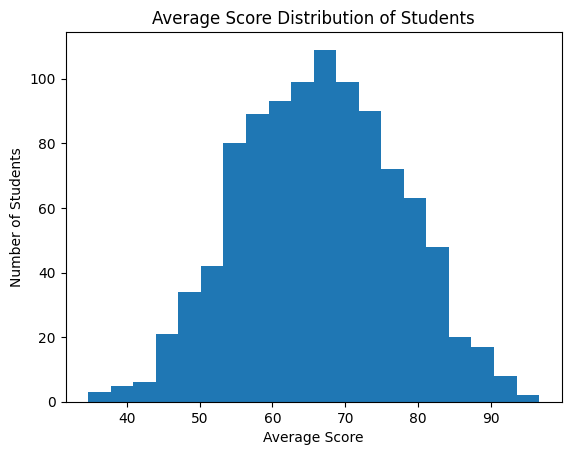

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['average'], bins=20)
plt.title("Average Score Distribution of Students")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()
